# 내가 시도한 것들

1. data augmentation
    - 국진님의 조언을 따라 데이터셋을 늘리려 하지 않고 성능을 내보려 늘리는 대신 data augmentation을 시도했습니다.
    - 하지만 제가 이해한 한정된 예시에서는 data를 불러오는 과정에서부터 달라져야 하기 때문에 시도하지 않기로 했습니다.
2. L2규제 Dropout
    - 두 역할이 정확히 뭔지도 모르고 오버피팅을 줄이려 시도해보았습니다.
    - 별다른 효과는 없었습니다
3. dataset 크기 늘리기
    - 영빈님의 조언을 듣고 데이터셋을 그냥 늘리기로 결정했습니다.
    - 가장 유의미한 성능 향상이 일어난 부분일거라 예상합니다.
4. layer 추가, 채널과 dense 조정
    - 수작업으로 하이퍼파라미터를 요리조리 조정해봤습니다.
    - valid 데이터를 사용하지 않고 test 데이터에 fit하는 모델을 만든 것 같아 아쉬움이 남습니다

# 더 나아가기 & 보완사항
1. 다음 모델링을 할 때는 data를 불러오는 것부터 설계하는 과정을 lms의 함수 도움없이 해보고 싶습니다.
2. layer를 늘리고, 채널과 dense를 조정하고, Conv2D와 Falling을 하는 효과등을 이해하여 적절한 하이퍼파라미터 조정을 하고 싶습니다.
3. train-test 셋만 쓰지않고 train-valid-test 셋으로 나누어 효과적인 테스트를 하고 마지막에 test데이터를 모델이 만날 수 있도록 설계하고 싶습니다.
4. 하이퍼파라미터를 직접 수작업으로 조정하지 않고 튜닝등의 기법을 사용하여 도움을 받고 싶습니다

In [1]:
from PIL import Image
from tensorflow import keras
import os, glob

In [2]:
PATH = os.getenv("HOME") + "/aiffel/aiffel/explorations/datasets/rock_scissor_paper/"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(img_path)
    print(len(images), "images to be resized")

    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized")

resize_images(PATH + "train/scissor")
resize_images(PATH + "train/paper")
resize_images(PATH + "train/rock")
resize_images(PATH + "test/scissor")
resize_images(PATH + "test/paper")
resize_images(PATH + "test/rock")

/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/train/scissor
516 images to be resized
516  images resized
/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/train/paper
368 images to be resized
368  images resized
/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/train/rock
429 images to be resized
429  images resized
/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/test/scissor
100 images to be resized
100  images resized
/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/test/paper
100 images to be resized
100  images resized
/aiffel/aiffel/aiffel/explorations/datasets/rock_scissor_paper/test/rock
100 images to be resized
100  images resized


In [3]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    print(idx)

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    print(idx)

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data(PATH + "train", 1313)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
(x_test, y_test)=load_data(PATH + "test")
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

516
945
학습데이터(x_train)의 이미지 개수는 1313 입니다.
100
200
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (1313, 28, 28, 3)
y_train shape: (1313,)
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [4]:
n_channel_1=32
n_channel_2=64
n_channel_3=128
n_dense_1=256
n_dense_2=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))
                                  
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
42/42 [==============================] - 7s 71ms/step - loss: 1.0714 - accuracy: 0.4252
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 0.8954 - accuracy: 0.5760
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss

In [5]:
test_loss, test_accuracy = model.evaluate(x_test_norm ,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - loss: 0.8618 - accuracy: 0.6133
test_loss: 0.8617609739303589 
test_accuracy: 0.6133333444595337


In [6]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=140  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.1244038e-04 9.7993922e-01 1.9848324e-02]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


In [7]:
import matplotlib.pyplot as plt

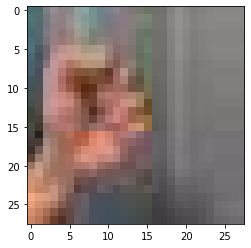

In [8]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.02205256 0.536353   0.44159442]
라벨: 0, 예측결과: 1


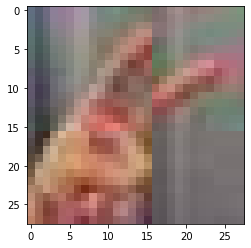

예측확률분포: [0.37003365 0.16552909 0.4644373 ]
라벨: 0, 예측결과: 2


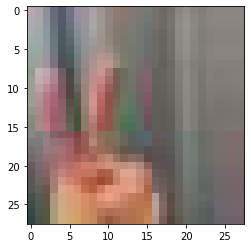

예측확률분포: [0.09788799 0.15173124 0.75038075]
라벨: 0, 예측결과: 2


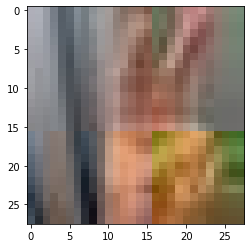

예측확률분포: [0.16149917 0.0752732  0.7632277 ]
라벨: 0, 예측결과: 2


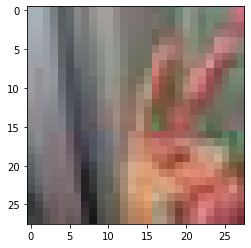

예측확률분포: [0.0146918 0.5010129 0.4842953]
라벨: 2, 예측결과: 1


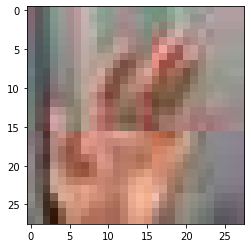

In [9]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()
